# Day 4
# Discrete Fourier Transform

## Calculation of complex numbers

In [1]:
import math
import numpy as np
x = 2.0 + 1.0j
y = complex(1.0, - 2.0)
print("x + y = {0}".format(x + y))
print(x.real)
print("real = {0}, imaginary = {1}".format(x.real, x.imag))
print("conjugate x = {0}".format(x.conjugate()))
print("exp(x) = {0} + {1}j".format(math.exp(x.real) * math.cos(x.imag), math.exp(x.real) * math.sin(x.imag)))
print("exp(x) = {0}".format(np.exp(x)))
# print("exp(x) = {0}".format(math.exp(x)))       


x + y = (3-1j)
2.0
real = 2.0, imaginary = 1.0
conjugate x = (2-1j)
exp(x) = 3.992324048441272 + 6.217676312367968j
exp(x) = (3.992324048441272+6.217676312367968j)


## Practice
- Try substraction, multiplication, and division
- Try cos function of complex number and check it by calculation of real values
$$
    \cos x = \frac{e^{ix}+e^{-ix}}{2} = \frac{e^{i(\alpha + i \beta)}+e^{-i(\alpha + i \beta)}}{2}=\frac{e^{-\beta + i\alpha}+e^{\beta -i\alpha}}{2}=\frac{e^{-\beta} (\cos \alpha + i \sin \alpha)+e^{\beta}(\cos \alpha - i \sin \alpha)}{2}=\cos \alpha \cosh \beta - i \sin \alpha \sinh \beta 
$$

In [2]:
# Make a program
import math
import numpy as np
x = 2.0 + 1.0j
y = complex(1.0, - 2.0)

print("x - y = {0}".format(x-y))
print("x * y = {0}".format(x*y))
print("x / y = {0}".format(x/y))
print("cos(x) = {0}".format(np.cos(x)))
print("cos(x) = {0} + ({1})j".format(math.cos(x.real) * math.cosh(x.imag), -math.sin(x.real)*math.sinh(x.imag)))


x - y = (1+3j)
x * y = (4-3j)
x / y = (-0+1j)
cos(x) = (-0.64214812471552-1.0686074213827783j)
cos(x) = -0.64214812471552 + (-1.0686074213827783)j


## Discrete Fourier Transform (DFT)
### Fourier expansion
- Transformation
    - $g(t)$ is defined on $[0, T]$.
    - $c_n$ is defined for $n=0,1,2,\ldots$
$$
c_n = \frac{1}{T}\int_0^T g(\tau) e^{-\frac{2 \pi i}{T}n \tau} d \tau
$$
- Inverse transformation
$$
g(t) = \sum_{n= -\infty}^{\infty} c_n e^{\frac{2 \pi i}{T}n t}
$$

### Fourier transform

- Transformation
    - $g(t)$ is defined on $(\infty, -\infty)$.
    - $G(f)$ is defined on $(\infty, -\infty)$.

$$
G(f) = \int_{-\infty}^{\infty} g(\tau) e^{-2 \pi i f \tau} d \tau
$$

- Inverse transformation
$$
g(t) = \int_{-\infty}^{\infty} G(f) e^{2 \pi i f t} d f
$$

### Discrete Fourier ransform (DFT)
- Transformation
    - $g[n]$ is defined for $n=0,1,2,\ldots,N-1$.
    - $G[m]$ is defined for $m=0,1,2,\ldots,N-1$.
$$
G[m] = \sum_{n = 0}^{N - 1}  g[n] e^{-\frac{2 \pi i}{N}nm}
$$
- Inverse transformation
$$
g[n] = \frac{1}{N} \sum_{m = 0}^{N - 1} G[m] e^{\frac{2 \pi i}{N}n m}
$$

### Fast Fourier transform
- Alogrithm for DFT
- With a similarly concept of Mearge sort, it can be accelerate the calclation.
- The computational complexity of a starndard DFT is $N^2$.
- The computational complexity of FFT is $N \log N$.

### Pactice

- Make a class `DFT` to calculate DFT of which data size is $N$.
    - `__init__(self, N)` 
        - Store `N` to the attribute `self.N`.
        - Make a table `expTbl[n]`$=e^{\frac{2 \pi i}{N}n}$ for $n=0,1,2,\ldots,N-1$. 
        - This table is used to make calculation of complex exponential functions once
    - `dft(self, data)`
        - Calculate the DFT of the attribute `data` type of `ndarry of complex128` and return the result. 
    - `idft(self, data)`
        - Calculate the inverse DFT of he attribute `data` type of `ndarry of complex128` and return the result. 
- Main program is provided.
    - The followin function is given.
$$
{\rm data}[n] = 4.0 \cos \left(\frac{2 \pi}{N} 2n \right) +  \sin \left(\frac{2 \pi}{N} 5n \right)
$$
    - A program to plot `out1[]` is provided.
- Calculate DFT of `data` by your class.
- Calculate of inverse DFT of the result by your class and check whether the result coincides with `data`.
- A class of FFT is provided so that compare their calculation speeds by increasing `N`.

In [3]:
# Make a program for DFT
import numpy as np
import math

class DFT:
    def __init__(self, N):
        self.N = N
        alpha = 2.*np.pi/self.N
        self.expTbl = np.exp(alpha*np.arange(self.N, dtype='complex128')*1j)
    
    def dft(self, data):
        dataOut   = np.zeros([self.N], dtype='complex128')
        for m in range(self.N):
            for n in range(self.N):
                dataOut[m] += data[n]*self.expTbl[(-n*m)%self.N]

        return dataOut
    
    def idft(self, data):
        dataOut   = np.zeros([self.N], dtype='complex128')
        for m in range(self.N):
            for n in range(self.N):
                dataOut[m] += data[n]*self.expTbl[(m*n)%self.N]
            dataOut[m] /= self.N

        return dataOut

In [4]:
#Program for FFT
import numpy as np
import math

class FFT:
    def __init__(self, N):
        self.N   = N
        self.N2 = int(N / 2)

        self.expTbl = np.empty([self.N2 + 1], dtype='complex128')
        alpha                = 2.0 * math.pi / self.N
        for n in range(0, self.N2):
            ang                   = alpha * n
            self.expTbl[n] = math.cos(ang) + math.sin(ang) * (1j)
        self.expTbl[self.N2] = -1.0 + 0j
        # Bit table
        self.bTbl = np.empty([32], dtype='int')
        ndig = 0
        bp    = 0
        
        while True:
            self.bTbl[bp] = (1 <<  bp)
            if ((self.N & self.bTbl[bp]) != 0):
                ndig = bp - 1
                break;
            bp += 1
        
        # Bit reverse table
        self.rbTbl = np.zeros([self.N], dtype='int')
        for n in range(0, self.N):
            for dig in range(0, ndig + 1):
                if (n & self.bTbl[dig]) != 0:
                    self.rbTbl[n] |= self.bTbl[ndig - dig]

    def dft(self, data):
        dataOut   = np.empty([self.N], dtype='complex128')
            
        # Reorder data
        for n in range(0, self.N):
            m = self.rbTbl[n]
            dataOut[m] = data[n]

        # Iternation of butterfly operation
        # k  = 1, 2, 4,  8,...
        # k2 = 2, 4, 8, 16,...
        k = 1
        while k < N:
            h   = 0
            k2 = k * 2
            d   = int(self.N / k2)
            for j in range(0, k):
                for i in range(j, self.N, k2):
                    ik = i + k
                    # Butterfly operation with k elements from i and k elements from ik.
                    tmp             = dataOut[ik] * self.expTbl[self.N2 - h]
                    tmp2            = dataOut[i] - tmp
                    dataOut[ik] = tmp + dataOut[i]
                    dataOut[i]  = tmp2
                h += d;
            k = k2;
        return dataOut
    
    def idft(self, data):
        dataOut   = np.empty([self.N], dtype='complex128')
            
        # Reorder data
        for n in range(0, self.N):
            m = self.rbTbl[n]
            dataOut[m] = data[n] / self.N

        # Itaration of butterfly operation
        # k  = 1, 2, 4,  8,...
        # k2 = 2, 4, 8, 16,...
        k = 1
        while k < self.N:
            h   = 0
            k2 = k * 2
            d   = int(self.N / k2)
            for j in range(0, k):
                for i in range(j, self.N, k2):
                    ik = i + k
                    # Butterfly operation with k elements from i and k elements from ik.
                    tmp            = dataOut[ik] * self.expTbl[h]
                    tmp2           = dataOut[i]  + tmp
                    dataOut[ik] =  dataOut[i] - tmp
                    dataOut[i]   = tmp2
                h += d;
            k = k2;
        return dataOut


time using DFT =  3.6099867820739746  sec
time using FFT =  0.019072532653808594  sec


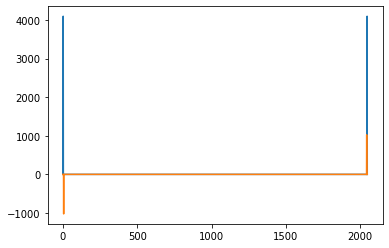

In [5]:
# Main program
import numpy as np
import math
import matplotlib.pyplot as plt
import time

# Make data
N = 2048
alpha = 2.0 * math.pi  / N

data = np.empty([N], dtype='complex128')
for n in range(0, N):
    data[n] = (4.0 * math.cos(2.0 * alpha * n) + 1.0 * math.sin(5.0 * alpha * n)) + 0j

# Construct the object to calculate
dft = DFT(N)

start = time.time()
out1 = dft.dft(data)
print("time using DFT = ", time.time() - start, " sec")

# Construct the object to calculate
dft = FFT(N)

start = time.time()
out1 = dft.dft(data)
print("time using FFT = ", time.time() - start, " sec")

out2 = dft.idft(out1)

out3 = out2 - data # Error between IDFT and DFT  
out0 = data        # Input

x  = np.empty([N])
y1 = np.empty([N])
y2 = np.empty([N])
for n in range(0, N):
    x[n]  = n
    y1[n] = out1[n].real
    y2[n] = out1[n].imag
    # print("out3[{0}] = {1}".format(n, out3[n]))

plt.plot(x, y1, x, y2)

## The time used by DFT is significantly more than time used by FFT
DFT uses nested loop to calculate the answer, hence, the time complexity is $O(N^2)$. While the FFT uses method similar to merge sort, makes it run with time complexity $O(NlogN)$. At larger N, the performance of FFT is dramatically better than that of DFT.

As shown in the result of the cell above, at $N=2048$, DFT used 3.610 seconds while FFT used only 0.019 seconds.

## Convolution
- We assume that all data are periodic : for $g[n]$ $(n=0,1,2,\ldots,N-1)$
$$
g[n] = g[n+N]
$$
- For $h[n]$ and $g[n]$ $(n=0,1,2,\ldots,N-1)$, the covolusion is defined as
$$
d[n] =  \sum_{k = 0}^{N - 1}  h[n-k] g[k] = \sum_{k = 0}^{N - 1} h[k] g[n-k] 
$$
- The 2nd and 3rd expressions coincide.
- Let $G[m]$, $H[m]$, and $D[m]$ be the DFTs of $g[n]$, $h[n]$, and $d[n]$, respectively. 
- We have for $m=0,1,2,\ldots,N-1$
$$
D[m] = H[m] G[m].
$$
### Practice 
- Make a class `Convolution` to calculate the convolution for data size $N$.
    - `__init__(self, N)` 
        - Store `N` to the attribute `self.N`.
    - `direct(self, h, g)`
        - Calculate the convlution directly of attributes `h` and `g` type of `ndarry of float` and return the result. 
    - `byFFT(self, h, g)`
        - Calculate the convlution using DFT (FFT) of attributes `h` and `g` type of `ndarry of float` and return the result.
- Main program is provided.
    - The followin functions are given with $\alpha = -8.0 n /N$:
$$
{\rm h}[n] =  \exp(\alpha n),
$$

$$
{\rm g}[n] = 
\left\{
\begin{array}{ll} 
1 &  (n \mod (N/4) = 0,)\\
0 &  (\mbox{else.})\\
\end{array}
\right.
$$
    - A program to plot `out1[]` is provided.
- Calculate the convolution of `h` and `g` by your class for both methods.
- Compare thecalculation speeds of the two by increasing `N`.

In [6]:
# Make a program: Calculate the convolution
import numpy as np
import math

class Convolution:
    def __init__(self, N):
        self.N = N
        
    def direct(self, h, g):
        d = np.zeros(self.N)
        for i in range(self.N):
             for j in range(self.N):
                 d[i] += h[(i-j)%self.N]*g[j]
        return d

    def byFFT(self, h, g):
        fft = FFT(self.N)
        H = fft.dft(h)
        G = fft.dft(g)
        D = H*G
        d = fft.idft(D)
        return d

Calculation time using direct method =  3.159153938293457  sec
Calculation time using FFT =  0.06313610076904297  sec


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


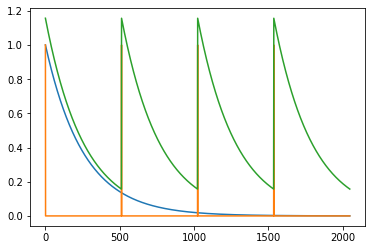

In [7]:
# Main program for convolution
import numpy as np
import math
import matplotlib.pyplot as plt
import time

# Make data
N = 2048
alpha = - 8.0  / N

h = np.zeros(N)
g = np.zeros(N)

for n in range(0, N):
    h[n] = math.exp(alpha * n)
    if n % (N / 4) == 0:
        g[n] = 1

# Construct the object to calculate
conv = Convolution(N)

start = time.time()
out1 = conv.direct(h, g)
print("Calculation time using direct method = ", time.time() - start, " sec")

start = time.time()
out1 = conv.byFFT(h, g)
print("Calculation time using FFT = ", time.time() - start, " sec")

x  = np.arange(N)
    
plt.plot(x, h, x, g, x, out1)

## Using FFT to do convolution is much faster than using direct method

The time complexity of doing convolution operation directly is $O(N^2)$ while that of using FFT is $O(NlogN)$. The results shows that, at $N=2048$, FFT method used 0.063 seconds and direct method used 3.159 seconds.

The FFT method uses fast fourier transform to convert $h$ and $g$ into $H$ and $G$. The step requires $O(NlogN)$ time complexity. Multiplying $H$ and $G$ uses only $O(N)$, and converting $D$ back to d requires $O(NlogN)$. Therefore, the whole process require $O(NlogN)$.

## 2-dimensional DFT

- Let $G[k,l]$ be the result of 2-dimensional DFT (2D-DFT) of $g[m,n]$ for  $m, k =0,1,2,\ldots,M-1$ and $n, l =0,1,2,\ldots,N-1$.
$$
G[k,l] = \sum_{m = 0}^{M - 1} \sum_{n = 0}^{N - 1}  g[m,n] e^{-\frac{2 \pi i}{M}km -\frac{2 \pi i}{N}ln}.
$$
- Inverse 2D-DFT can be also described as
$$
g[m,n] = \frac{1}{MN} \sum_{k = 0}^{M - 1} \sum_{l = 0}^{N - 1}  g[m,n] e^{\frac{2 \pi i}{M}km +\frac{2 \pi i}{N}ln}.
$$
- Let $H[k,l]$ be the result of 2-dimensional DFT (2D-DFT) of $h[m,n]$ for  $m, k =0,1,2,\ldots,M-1$ and $n, l =0,1,2,\ldots,N-1$.
- We are assuming that all functions here are periodic. The periods for the first and the second indeces are $M$ and $N$, respectively.
- 2D-DFT can be calculated as follows.
    0. Calculate 1D-DFT for each row of input data.
    0. Calculate 1D-DFT for each column of the result.
- 2D-convolution is given by
$$
d[m,n]=
\sum_{k = 0}^{M - 1} \sum_{l = 0}^{N - 1}  h[m-k, n-l] g[k,l]
=\sum_{k = 0}^{M - 1} \sum_{l = 0}^{N - 1} h[k,l] g[m-k, n-l].
$$
- Let $D[k,l]$ be the result of 2-dimensional DFT (2D-DFT) of $d[m,n]$ for  $m, k =0,1,2,\ldots,M-1$ and $n, l =0,1,2,\ldots,N-1$.
- We have
$$
D[k,l] = H[k,l]G[k,l].
$$


## Practice

- Make a class `DFT2D` to calculate 2D-DFT of which data size is `(M, N)` . 
    - We assume that `M` and  `N` are 2 powered numbers.
    - `__init__(self, M, N)`
        - Store `M` and `N` to the attribute `self.M` and `self.N`.
        - Construct objects of `FFT` for data of length `M` and `N`, respectively.
    - `dft2d(self, data)`
        - Calculate the 2D-DFT of the attribute data type of ndarry of 2D of complex128 and return the result by using FFT.
    - `idft2d(self, data)`
        - Calculate the inverse 2D-DFT of the attribute data type of ndarry of 2D of complex128 and return the result by using FFT.
- For a degradation model $h[m,n]$, we consider a uniform circular blur described by
$$
h[m,n] = \frac{h_{\rm 0}[m,n]}{\sum_{m=0}^{M-1}\sum_{n=0}^{N-1} h_{\rm 0}[m,n]}
$$
where
$$
h_{\rm 0}[m,n]  = 
\left\{
\begin{array}{cc}
1 & (\sqrt{m^2 + n^2} \leq r) \\
r + 1 - \sqrt{m^2 + n^2} & (r < \sqrt{m^2 + n^2} \leq r + 1) \\
0 & \mbox{(else)}
\end{array}
\right. .
$$
(They are periodic so that shorter distance should be used. For example, the distance between $(0, 0)$ and (M-1,0) is 1.)

In [10]:
# 2-dimensional DFT (FFT)
import numpy as np
import math

class DFT2D:
    def __init__(self, M, N):
        self.M = M
        self.N = N
        self.fftM = FFT(M)
        self.fftN = FFT(N)
        
    def dft2d(self, data):
        dataOut = np.empty([self.M, self.N], dtype='complex128')
        rowVect = np.empty([self.M], dtype='complex128')
        colVect = np.empty([self.N], dtype='complex128')

        for n in range(0, self.N):
            rowVect[:] = data[:,n]
            rowFFT = self.fftM.dft(rowVect)
            dataOut[:,n] = rowFFT[:]

        for m in range(0, self.M):
            colVect[:] = dataOut[m,:]
            colFFT = self.fftN.dft(colVect)
            dataOut[m,:] = colFFT[:]
        return dataOut
                
    def idft2d(self, data):
        dataOut = np.empty([self.M, self.N], dtype='complex128')
        rowVect = np.empty([self.M], dtype='complex128')
        colVect = np.empty([self.N], dtype='complex128')

        for n in range(0, self.N):
            rowVect[:] = data[:,n]
            rowFFT = self.fftM.idft(rowVect)
            dataOut[:,n] = rowFFT[:]

        for m in range(0, self.M):
            colVect[:] = dataOut[m,:]
            colFFT = self.fftN.idft(colVect)
            dataOut[m,:] = colFFT[:]
        return dataOut
        

# Before excute following programs, please mount Google drive.
As for the method, please see the `Let03S.ipynb`.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


End of program


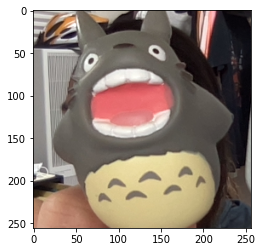

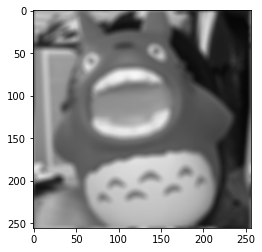

In [11]:
# Blur image
import numpy as np
import math
import matplotlib.pyplot as plt
import cv2

# Make h
def makeh(M, N, r):
    hC = np.empty([M, N], dtype='complex128')
    Mhalf = int(M/2)
    Nhalf = int(N/2)
    for m in range(0, Mhalf):
        for n in range(0, Nhalf):
            l = math.sqrt(m * m + n * n)
            hC[m,n] = valH(l, r)
        for n in range(Nhalf, N):
            l = math.sqrt(m * m + (N - n) * (N - n))
            hC[m,n] = valH(l, r)
    for m in range(Mhalf, M):
        for n in range(0, Nhalf):
            l = math.sqrt((M - m) * (N - m) + n * n)
            hC[m,n] = valH(l, r)
        for n in range(Nhalf, N):
            l = math.sqrt((M - m) * (N - m) + (N - n) * (N - n))
            hC[m,n] = valH(l, r)

    sumVal = np.abs(sum(sum(hC)))
    hC /= sumVal
    return hC

def valH(l, r):
    if (l < r):
        h = 1.0
    elif(l < r + 1):
        h = r + 1 - l
    else:
        h = 0
    return h

def boundImage(img):
    img[img > 255] = 255
    img[img < 0] = 0

# Blur size
r = 4.0

inImg = cv2.imread("/content/drive/My Drive/APN_data/crop2.tif")
show_img = cv2.cvtColor(inImg, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img)
gray  = cv2.cvtColor(inImg, cv2.COLOR_BGR2GRAY)

cv2.startWindowThread()

M, N  = gray.shape
hC    = makeh(M, N, r)

grayC = gray.astype('complex128')

dft2d = DFT2D(M,N)
grayF = dft2d.dft2d(grayC)
hF    = dft2d.dft2d(hC)

# Convolution by Fourier transform
blurF = hF * grayF

blurC = dft2d.idft2d(blurF)
blurR = blurC.real
boundImage(blurR)
blur = blurR.astype('uint8')
show_img = cv2.cvtColor(blur, cv2.COLOR_GRAY2RGB) 
plt.figure()
plt.imshow(show_img)

cv2.imwrite("/content/drive/My Drive/APN_data/blur.tif", blur)
cv2.imwrite("/content/drive/My Drive/APN_data/blur.jpg", blur)

print("End of program")

## Image degradation

- For image observation $h[k,l]$ expresses blur, etc.
- However, noise may be added in observation so that we consider the following model.
$$
d[m,n] = \sum_{k = 0}^{M-1} \sum_{l = 0}^{N-1} h[k,l] g[m-k,n-l] + n[m,n],
$$
where $n[m,n]$ expresses noise.
- Let $N[k,l]$ be the result of 2-dimensional DFT (2D-DFT) of $n[m,n]$, respectively for  $m, k =0,1,2,\ldots,M-1$ and $n, l =0,1,2,\ldots,N-1$.
- We have
$$
D[k,l] = H[k,l]G[k,l] + N[k,l].
$$
- We consider a problem to estimate the original image $g[m,n]$ from the observed image $d[m,n]$.
- Here, we assume that the estimation is done by convolution between $p[m,n]$ and $d[m,n]$.
- Let $\hat{g}[m,n]$ be the estimated original image.
$$
\hat{f}[m,n] =  \sum_{k = 0}^{M-1} \sum_{l = 0}^{N-1} p[k,l]d[m-k,n-l]
$$
- Let $P[k,l]$ and $\hat{G}[m,n]$ be the results of 2-dimensional DFT (2D-DFT) of $p[m,n]$ and $\hat{g}[m,n]$, respectively for  $m, k =0,1,2,\ldots,M-1$ and $n, l =0,1,2,\ldots,N-1$.
- We have
$$
\hat{G}[k,l] =  P[k,l]D[k,l].
$$

## Wiener filter

- We have decide $p[m,n]$ or $P[k,l]$ for restoration.
- Wiener filter is a classical method for restoration.
- For a 2D-singal $x[m,n]$, $E_x$ denotes the ensemble expectation with respect to $x$.
- The correlation matrix $u[k,l]$ of $x[k,l]$ is given by 
$$
u[k,l] = E_{x} x[m+k,n+l] x[m,n]
$$
- We assume that the signal is statistically motion invariant.
- Then, $u[k,l]$ does not depend on $m$ and $n$.
- The power spectrum is given as the expectation of $|X[k,l]|^2$ for a 2D-DFT $X[k,l]$ of a signal $x[k,l]$.
- The averaged power spectrum and the results of 2-dimensional DFT (2D-DFT) of correlation matrix coincide with each other.
- We assume that the followings are known.
    - $H[k,l]$ : The results of 2-dimensional DFT (2D-DFT) of the degradation $h[m,n]$.
    - $U[k,l]$ : The averaged power spectrum for all images.
    - $V[k,l]$ : The averaged power spectrum for all noises.
- Wiener filter is defined as
$$
P[k,l] = \frac{U[k,l]\overline{H[k,l]}}{H[k,l]U[k,l]\overline{H[k,l]} +V[k,l]}.
$$

## Practice
- Make a program for Winer filter
    - Use the previous  model of $h[m,n]$
    - The correlation matrix $u[m,n]$ of all images is given by 
$$
u[m,n] = 128.0^2 \gamma^{m^2 + n^2}
$$
(They are periodic so that shorter distance to $(0,0)$ should be used.)
    - The correlation matrix $v[m,n]$ of all noises is given by 
$$
v[m,n]  = 
\left\{
\begin{array}{cc}
1 & (m = 0, \, n = 0) \\
0 & \mbox{(else)}
\end{array}
\right. .
$$

Start 2D DFT
End of 2D DFT


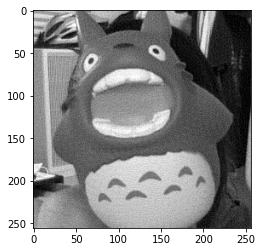

In [12]:
# Fill after 'restoreF ='
## Wiener filter
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Function to make u[m, n]
def makeu(M, N, gamma):
    uC = np.empty([M, N], dtype='complex128')
    Mhalf = int(M/2)
    Nhalf = int(N/2)
    for m in range(0, Mhalf):
        for n in range(0, Nhalf):
            l = math.sqrt(m * m + n * n)
            uC[m,n] = gamma ** l
        for n in range(Nhalf,N):
            l = math.sqrt(m * m + (N - n) * (N - n))
            uC[m,n] = gamma ** l
    for m in range(Mhalf, M):
        for n in range(0, Nhalf):
            l = math.sqrt((M - m) * (N - m) + n * n)
            uC[m,n] = gamma ** l
        for n in range(Nhalf, N):
            l = math.sqrt((M - m) * (N - m) + (N - n) * (N - n))
            uC[m,n] = gamma ** l

    uC *= 128 * 128
    return uC

# Main program
# Blur size
r     = 4.0
# Parameter for matrix y[m, n]
gamma = 0.3

inImg  = cv2.imread("/content/drive/My Drive/APN_data/blur.tif")
degrad = cv2.cvtColor(inImg, cv2.COLOR_BGR2GRAY)
M, N  = degrad.shape

# Convert image to complex numbers and make matrices h[m, n], u[m, n], and v[m, n]
degradC = degrad.astype('complex128')
hC    = makeh(M, N, r)
uC    = makeu(M, N, gamma)
vC    = np.zeros((M, N), dtype=np.complex_)
vC[0,0] = 1.0

# 2-dimsional DFT
dft2d   = DFT2D(M,N)
print("Start 2D DFT")
degradF = dft2d.dft2d(degradC)
hF      = dft2d.dft2d(hC)
uF      = dft2d.dft2d(uC)
vF      = dft2d.dft2d(vC)
print("End of 2D DFT")

# Winer filtering in Fourier domain
hFConj  = np.conjugate(hF)
restoreF = (uF*hFConj*degradF)/(hF*uF*hFConj+vF)

# Inverse 2-dimensional DFT
restoreC = dft2d.idft2d(restoreF)
restoreR = restoreC.real
boundImage(restoreR)
restore = restoreR.astype('uint8')

cv2.imwrite("/content/drive/My Drive/APN_data/restore.tif", restore)
cv2.imwrite("/content/drive/My Drive/APN_data/restore.jpg", restore)

show_img = cv2.cvtColor(restore, cv2.COLOR_GRAY2RGB) 
plt.imshow(show_img)

## Camera capture

* This program was made by using snippet of Google Colaboratory. 
* Excute the following program.
  * Allow to use camera for this program.
  * Click 'Capture' above the image.
  * Then, image file is saved.
* Excute the next program to crop the image of the size $2^n$ for FFT.
* But if the program does not work in your compute, please upload a proper image that you like.

<IPython.core.display.Javascript object>

Saved to /content/drive/My Drive/APN_data/capture2.png


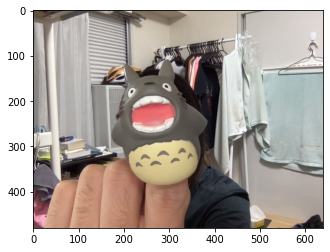

In [58]:
# Capture image
from IPython.display import display, Javascript
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# Mail program 
# from IPython.display import Image
try:
  filename = take_photo('/content/drive/My Drive/APN_data/capture2.png', 1.0)
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  inImg  = cv2.imread("/content/drive/My Drive/APN_data/capture2.png")
  show_img = cv2.cvtColor(inImg, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err)) 

nH =  640  nV =  480  nC =  3


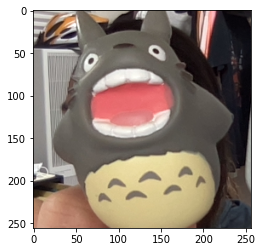

In [65]:
# Crop image
import numpy as np
import matplotlib.pyplot as plt
import cv2
nSq = 256

stH = 150
stV = 120
inImg  = cv2.imread("/content/drive/My Drive/APN_data/capture2.png")
M, N, C = inImg.shape
print('nH = ', N, ' nV = ', M, ' nC = ', C)

crop   = inImg[stV:(stV + nSq), stH:(stH + nSq), :]
cv2.imwrite("/content/drive/My Drive/APN_data/crop2.tif", crop)
cv2.imwrite("/content/drive/My Drive/APN_data/crop2.jpg", crop)

show_img = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img)

## Degradation and Restoration of a photo
The original picture shown below has dimension of 256x256 pixels.

<p><img src="https://drive.google.com/uc?export=view&id=1-0fbD6UTEktitRhU7z728N0df7RDYsOY" alt="表示エラー" /></p>

Then I degraded the picture by converting it into greyscale and bluring it using a kernel to convolution with the picture. The result is shown below.

<p><img src="https://drive.google.com/uc?export=view&id=1-Ex3vIRoooArlWTI00y7seHB2-_-weXo" alt="表示エラー" /></p>

Finally, I restored the picture using Wiener filter to convolution with the picture. and the result is below

<p><img src="https://drive.google.com/uc?export=view&id=1-fmrBjtOK_YU-ndJ00CYXOvaXVvFqpsE" alt="表示エラー" /></p>


## Display image in Google Drive on markdown document

* `Get Link` of the image file with sharing anyone who knows the link.
* It is as
    https://drive.google.com/file/d/1KwJg418MDn4u7RKozGkA0IY9dVD2Eftc/view?usp=sharing
* By extracting ID part and change URL as
   http://drive.google.com/uc?export=view&id=1KwJg418MDn4u7RKozGkA0IY9dVD2Eftc
* To show image, describe as follows.
```
    <p><img src="http://drive.google.com/uc?export=view&id=1KwJg418MDn4u7RKozGkA0IY9dVD2Eftc" alt="表示エラー" /></p> 
```

<p><img src="http://drive.google.com/uc?export=view&id=1KwJg418MDn4u7RKozGkA0IY9dVD2Eftc" alt="表示エラー" /></p> 



